In [1]:
import numpy as np #import thư viện numpy để tính toán các phép toán trên ma trận
import cv2 #import thư viện cv2 để xử lý ảnh
import matplotlib.pyplot as plt #import thư viện matplotlib để vẽ đồ thị
import tensorflow as tf #import thư viện tensorflow để xây dựng mô hình

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array #import thư viện load_img và img_to_array để load ảnh và chuyển ảnh thành ma trận

In [3]:
# load model
model = tf.keras.models.load_model('./models/object_detection.h5') #load model đã train
print('model loaded sucessfully')

c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


model loaded sucessfully


In [4]:
path = './test_images/N207.jpeg' #đường dẫn ảnh
image = load_img(path) # PIL object #load ảnh
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255) #chuyển ảnh thành ma trận
image1 = load_img(path,target_size=(224,224)) #load ảnh với kích thước 224x224, 224x224 là kích thước mà model train
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output #chuyển ảnh thành ma trận và chuẩn hóa giá trị thành 0-1

In [5]:
# size of the orginal image
h,w,d = image.shape #lấy kích thước ảnh gồm chiều cao, chiều rộng và số kênh màu
print('Height of the image =',h) #in ra chiều cao ảnh
print('Width of the image =',w) #in ra chiều rộng ảnh

Height of the image = 423
Width of the image = 541


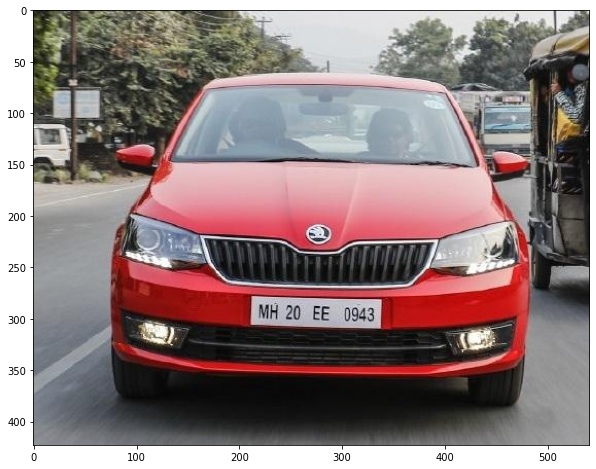

In [6]:
plt.figure(figsize=(10,8)) #tạo 1 figure với kích thước 10x8
plt.imshow(image) #vẽ ảnh
plt.show() #hiển thị ảnh

In [7]:
image_arr_224.shape #in ra hình dạng của ma trận ảnh gồm 224x224x3, 224x224 là kích thước ảnh, 3 là số kênh màu

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3) #reshape ma trận ảnh thành 1x224x224x3, 1 là số ảnh, 224x224 là kích thước ảnh, 3 là số kênh màu
test_arr.shape #in ra hình dạng của ma trận ảnh

(1, 224, 224, 3)

In [9]:
# make predictions, đưa ra dự đoán
coords = model.predict(test_arr) #dự đoán vị trí của object
coords #in ra vị trí của object, có dạng mảng [xmin, xmax, ymin, ymax], giá trị của các phần tử trong mảng nằm trong khoảng 0-1

1/1 [==============================] - 2s 2s/step


array([[0.40649042, 0.62730503, 0.6722863 , 0.7363779 ]], dtype=float32)

In [10]:
# denormalize the values, chuyển lại giá trị vị trí bounding box về kích thước ảnh gốc
denorm = np.array([w,w,h,h]) #tạo 1 mảng gồm 4 phần tử, 2 phần tử đầu là chiều rộng ảnh, 2 phần tử sau là chiều cao ảnh
coords = coords * denorm #nhân ma trận vị trí của object với ma trận kích thước ảnh gốc để chuyển vị trí về kích thước ảnh gốc
coords

array([[219.9113147 , 339.37202168, 284.37709308, 311.48784953]])

In [11]:
coords = coords.astype(np.int32) #chuyển giá trị vị trí bounding box về dạng số nguyên
coords

array([[219, 339, 284, 311]])

(219, 284) (339, 311)


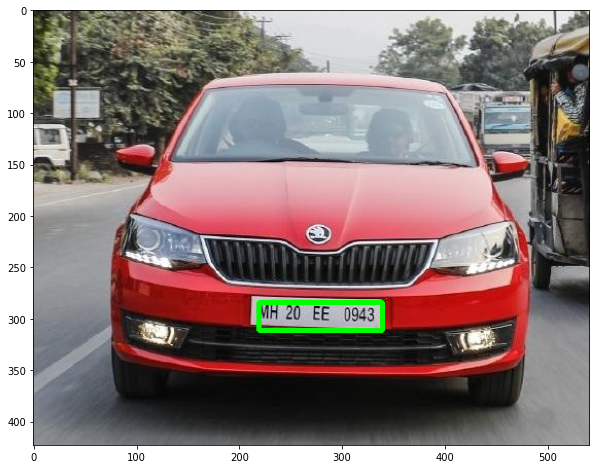

In [12]:
# draw bounding on top the image, vẽ bounding box lên ảnh
xmin, xmax,ymin,ymax = coords[0] #lấy ra giá trị vị trí bounding box
pt1 =(xmin,ymin) #điểm trái dưới bounding box
pt2 =(xmax,ymax) #điểm phải trên bounding box
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3) #vẽ bounding box lên ảnh, 0,255,0 là màu xanh lá cây, 3 là độ dày của đường viền

plt.figure(figsize=(10,8)) #tạo 1 figure với kích thước 10x8
plt.imshow(image) #vẽ ảnh
plt.show() #hiển thị ảnh

In [13]:
# create pipeline, chuyển quá trình bên trên thành 1 hàm
path = './test_images/N207.jpeg'
#Hàm object_detection() nhận vào đường dẫn của ảnh, đọc ảnh, dự đoán vị trí của object, vẽ bounding box lên ảnh và trả về ảnh đã vẽ bounding box
def object_detection(path):
    # read image
    image = load_img(path) # PIL object #đọc ảnh
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255) #chuyển ảnh thành ma trận
    image1 = load_img(path,target_size=(224,224)) #đọc ảnh với kích thước 224x224
    # data preprocessing, tiền xử lý dữ liệu ảnh muốn dự đoán
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output #chuyển ảnh thành ma trận và chuẩn hóa giá trị của các phần tử trong ma trận về khoảng 0-1
    h,w,d = image.shape #lấy chiều cao, chiều rộng, số kênh màu của ảnh
    test_arr = image_arr_224.reshape(1,224,224,3) #reshape ma trận ảnh thành 1x224x224x3, 1 là số ảnh, 224x224 là kích thước ảnh, 3 là số kênh màu
    # make predictions, tiến hành dự đoán
    coords = model.predict(test_arr) #dự đoán vị trí của object (object ở đây là biển số xe)
    # denormalize the values, chuyển lại giá trị vị trí bounding box về kích thước ảnh gốc
    denorm = np.array([w,w,h,h]) #tạo 1 mảng gồm 4 phần tử, 2 phần tử đầu là chiều rộng ảnh, 2 phần tử sau là chiều cao ảnh
    coords = coords * denorm #nhân ma trận vị trí của object với ma trận kích thước ảnh gốc để chuyển vị trí về kích thước ảnh gốc
    coords = coords.astype(np.int32) #chuyển giá trị vị trí bounding box về dạng số nguyên
    # draw bounding on top the image, vẽ bounding box lên ảnh
    xmin, xmax,ymin,ymax = coords[0] #lấy ra giá trị vị trí bounding box
    pt1 =(xmin,ymin) #điểm trái dưới bounding box
    pt2 =(xmax,ymax) #điểm phải trên bounding box
    print(pt1, pt2) #in ra vị trí bounding box
    cv2.rectangle(image,pt1,pt2,(0,255,0),3) #vẽ bounding box lên ảnh, 0,255,0 là màu xanh lá cây, 3 là độ dày của đường viền
    return image, coords #trả về ảnh đã vẽ bounding box và vị trí bounding box

1/1 [==============================] - 0s 132ms/step
(441, 544) (608, 587)


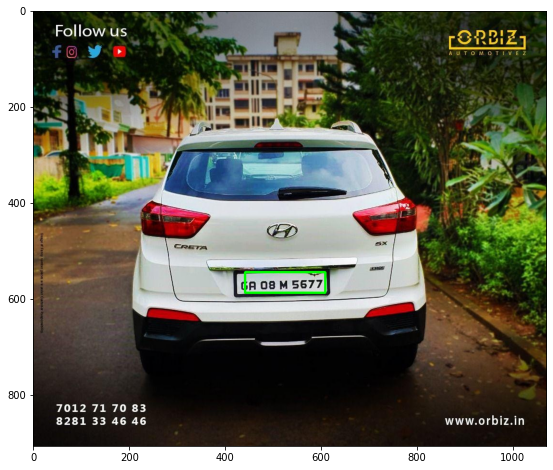

In [19]:
path = './test_images/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [ ]:
import pytesseract as pt

In [ ]:
path = './test_images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

In [ ]:
plt.imshow(roi)
plt.show()

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd ="C:\\Program Files\\Tesseract-OCR\\tesseract.exe" # Path to tesseract.exe
# extract text from image
text = pt.image_to_string(roi)
print(text)